<a href="https://colab.research.google.com/github/sergiomora03/AdvancedTopicsAnalytics/blob/main/exercises/E2-HomeworksAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

## Analyze class homeworks


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_excel('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/Consolidado_respuestas_escribir_v2.xlsx')
data.head()

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,NaN
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,NaN
2,M,Una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r..."
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,NaN
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...


In [102]:
data.columns

Index(['Genero', 'E1 - Examples of Time Series Analysis', 'E4 - Panel Data',
       'E6 - Decison Trees', 'E8 - Ensemble Trees Overview', 'E10 - REST-API',
       'E11 - Natural Language Processing Overview'],
      dtype='object')

In [103]:
print(f'la cantidad de estudiantes son {len(data)}')

la cantidad de estudiantes son 46


# Exercise 2.1

Analyze the writing patterns of each student

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# Contar palabras para saber cuántas palabras usa cada estudiante
def count_words(text):
    if isinstance(text, str):
        return len(text.split())  # Cuenta el número de palabras
    else:
        return 0  # Si el valor no es un string, se cuenta como 0 palabras


# Aplicar la función a las columnas de texto para calcular el número de palabras
data['E1_word_count'] = data['E1 - Examples of Time Series Analysis'].apply(count_words)
data['E4_word_count'] = data['E4 - Panel Data'].apply(count_words)
data['E6_word_count'] = data['E6 - Decison Trees'].apply(count_words)
data['E8_word_count'] = data['E8 - Ensemble Trees Overview'].apply(count_words)  # Corrige el nombre aquí
data['E10_word_count'] = data['E10 - REST-API'].apply(count_words)  # Corrige el nombre aquí
data['E11_word_count'] = data['E11 - Natural Language Processing Overview'].apply(count_words)  # Corrige el nombre aquí


print(data[['Genero', 'E1_word_count', 'E4_word_count', 'E6_word_count', 'E8_word_count', 'E10_word_count', 'E11_word_count']].head(5))


  Genero  E1_word_count  E4_word_count  E6_word_count  E8_word_count  \
0      M            301             51            319            309   
1      F            478            190            341            382   
2      M            244              0            319            351   
3      M            333            119            273            372   
4      M            361            228            517            417   

   E10_word_count  E11_word_count  
0             302               0  
1             305               0  
2             334             160  
3             331               0  
4             341             210  


Promedio de palabras por tarea:
E1_word_count     295.913043
E4_word_count     156.739130
E6_word_count     297.369565
E8_word_count     266.804348
E10_word_count    317.260870
E11_word_count     74.065217
dtype: float64


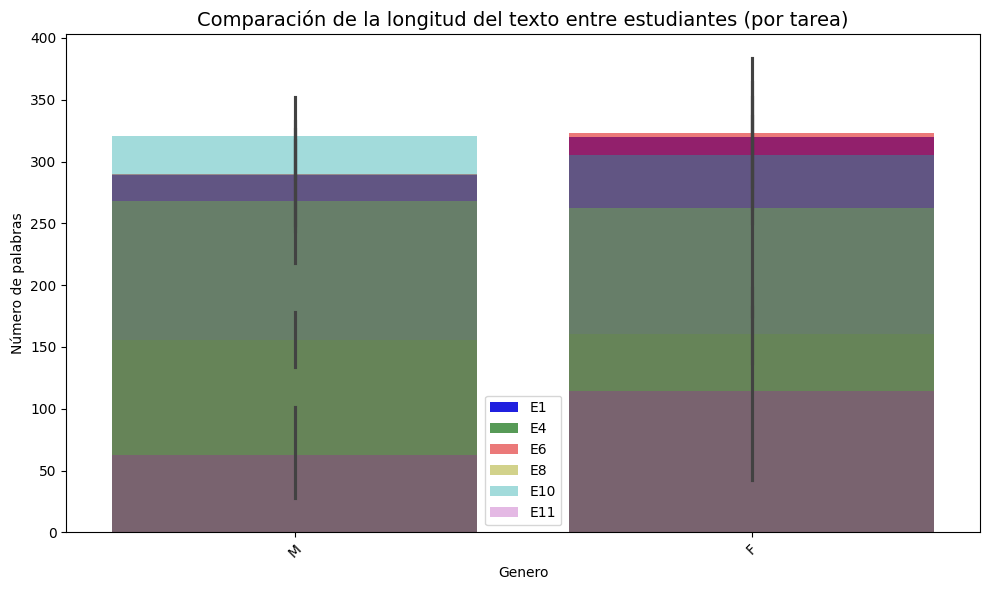

In [106]:
# Calcular el promedio de palabras que usan los estudiantes por tarea
promedios_por_tarea = data[['E1_word_count', 'E4_word_count', 'E6_word_count', 'E8_word_count', 'E10_word_count', 'E11_word_count']].mean()
print("Promedio de palabras por tarea:")
print(promedios_por_tarea)

#Comparar el número de palabras que emplean los estudiantes por género
plt.figure(figsize=(10, 6))
sns.barplot(x='Genero', y='E1_word_count', data=data, color="b", label='E1')
sns.barplot(x='Genero', y='E4_word_count', data=data, color="g", label='E4', alpha=0.7)
sns.barplot(x='Genero', y='E6_word_count', data=data, color="r", label='E6', alpha=0.6)
sns.barplot(x='Genero', y='E8_word_count', data=data, color="y", label='E8', alpha=0.5)
sns.barplot(x='Genero', y='E10_word_count', data=data, color="c", label='E10', alpha=0.4)
sns.barplot(x='Genero', y='E11_word_count', data=data, color="m", label='E11', alpha=0.3)

plt.title('Comparación de la longitud del texto entre estudiantes (por tarea)', fontsize=14)
plt.ylabel('Número de palabras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [107]:
# Agrupar por género y calcular el promedio de palabras por tarea
average_word_count_by_gender = data.groupby('Genero')[['E1_word_count', 'E4_word_count', 'E6_word_count', 'E8_word_count', 'E10_word_count', 'E11_word_count']].mean()
print(average_word_count_by_gender)

        E1_word_count  E4_word_count  E6_word_count  E8_word_count  \
Genero                                                               
F          319.800000     160.700000     323.200000     262.700000   
M          289.277778     155.638889     290.194444     267.944444   

        E10_word_count  E11_word_count  
Genero                                  
F           305.000000      114.200000  
M           320.666667       62.916667  


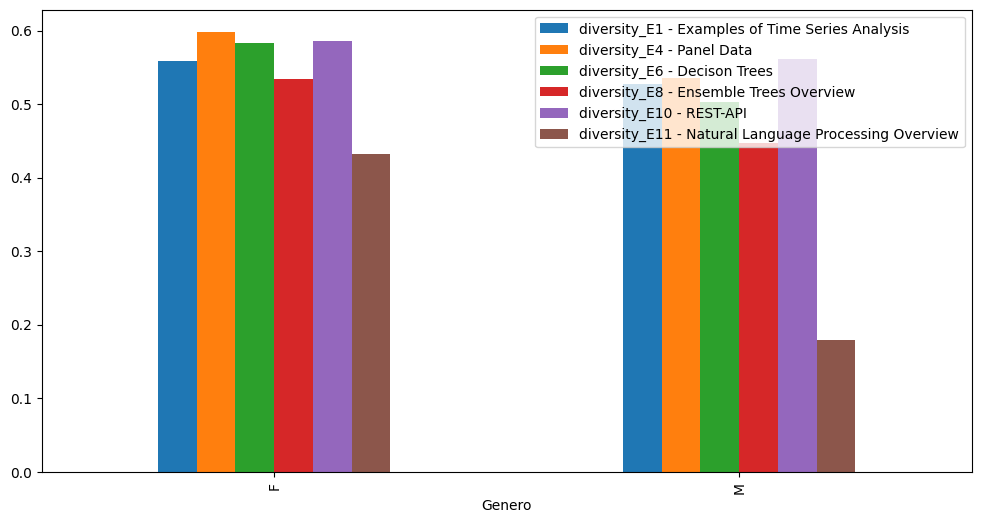

In [108]:
#La función vocabulary_diversity evalúa qué tan variado es el vocabulario de un texto dado
# calculando la proporción de palabras únicas con respecto al total de palabras.

def vocabulary_diversity(text):
    if pd.isna(text):
        return 0
    words = text.split()
    unique_words = set(words)
    return len(unique_words) / len(words) if len(words) > 0 else 0

# Lista de tareas
columns_to_analyze = [
    'E1 - Examples of Time Series Analysis',
    'E4 - Panel Data',
    'E6 - Decison Trees',
    'E8 - Ensemble Trees Overview',
    'E10 - REST-API',
    'E11 - Natural Language Processing Overview'
]

# Aplicar la función a cada columna en la lista
for column in columns_to_analyze:
    data[f'diversity_{column}'] = data[column].apply(vocabulary_diversity)
diversity_means = data.groupby('Genero')[['diversity_' + column for column in columns_to_analyze]].mean()

diversity_means.plot(kind='bar', figsize=(12, 6))
plt.show()


In [109]:
print(data[[column for column in data.columns if 'diversity_' in column]])

    diversity_E1 - Examples of Time Series Analysis  \
0                                          0.518272   
1                                          0.531381   
2                                          0.454918   
3                                          0.486486   
4                                          0.559557   
5                                          0.607038   
6                                          0.000000   
7                                          0.541806   
8                                          0.603015   
9                                          0.800000   
10                                         0.509158   
11                                         0.585586   
12                                         0.480726   
13                                         0.552941   
14                                         0.527473   
15                                         0.733945   
16                                         0.482618   
17        

En términos generales, el análisis del conteo de palabras reveló que, el promedio de palabras utilizadas por estudiantes es aproximadamente 234.6. La tarea E10 se destaca por tener el mayor número promedio de palabras en las respuestas, mientras que la tarea E11 presenta el promedio más bajo, esto puede deberse a la alta presencia de nulos en las respuestas a dicha tarea. Algo que también se identificó es que las mujeres tienden a utilizar un mayor número promedio de palabras en sus respuestas.

En cuanto a la diversidad del vocabulario, que se entiende como la proporción de palabras únicas respecto al total de palabras, se identificó una diversidad promedio de 0.55 entre todos los estudiantes. En este punto se identificó que que la diversidad del género femenino (0.60) es ligeramente superior a la del género masculino (0.55), especialmente en tareas como E11, E8 y E4.



# Exercise 2.2

Evaluate the similarities of the homeworks of the students.

At a homework level, then as a student level.


### A nivel de estudiante


In [110]:
# Definir las columnas de respuestas (todas menos "Genero")
respuestas_cols = data.columns.difference(['Genero'])
respuestas_cols

Index(['E1 - Examples of Time Series Analysis', 'E10 - REST-API',
       'E10_word_count', 'E11 - Natural Language Processing Overview',
       'E11_word_count', 'E1_word_count', 'E4 - Panel Data', 'E4_word_count',
       'E6 - Decison Trees', 'E6_word_count', 'E8 - Ensemble Trees Overview',
       'E8_word_count', 'diversity_E1 - Examples of Time Series Analysis',
       'diversity_E10 - REST-API',
       'diversity_E11 - Natural Language Processing Overview',
       'diversity_E4 - Panel Data', 'diversity_E6 - Decison Trees',
       'diversity_E8 - Ensemble Trees Overview'],
      dtype='object')

In [111]:
#Función de Jaccard
def jaccard_similarity(query, document):
    query = str(query).split()
    document = str(document).split()
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    if len(union) == 0:
        return 0
    return len(intersection) / len(union)

In [112]:
# Función para calcular similitud de Jaccard  entre todas las respuestas de los estudiantes i y j
def jaccard_similarity_per_student(df, respuestas_cols):
    Prom_similitud = []
    Max_similitud = []

    # Iterar sobre cada estudiante (filas del DataFrame)
    for i, row_i in df.iterrows():
        respuesta_estudiante_i = row_i[respuestas_cols].dropna().astype(str).values
        sim_matrix = []

        for j, row_j in df.iterrows():
            if i != j:  # Asegurarse de no comparar al estudiante consigo mismo
                respuesta_estudiante_j = row_j[respuestas_cols].dropna().astype(str).values
                sim = jaccard_similarity(" ".join(respuesta_estudiante_i), " ".join(respuesta_estudiante_j))
                sim_matrix.append(sim)

        if len(sim_matrix) > 0:
            avg_similarity = np.mean(sim_matrix) #la media
            max_similarity = np.max(sim_matrix) #el maximo
        else:
            avg_similarity = np.nan
            max_similarity = np.nan

        Prom_similitud.append(avg_similarity)
        Max_similitud.append(max_similarity)

    return Prom_similitud, Max_similitud

In [113]:
# Aplicar la función a todos los estudiantes
data['jaccard_similarity_avg_student'], data['jaccard_similarity_max_student'] = jaccard_similarity_per_student(data, respuestas_cols)
print(data[['Genero', 'jaccard_similarity_avg_student', 'jaccard_similarity_max_student']].sort_values(by='jaccard_similarity_avg_student', ascending=False).head())


   Genero  jaccard_similarity_avg_student  jaccard_similarity_max_student
22      M                        0.141352                        0.218045
21      M                        0.137762                        0.218045
37      M                        0.134497                        0.250572
36      M                        0.131516                        0.193488
32      M                        0.130328                        0.185556


El estudiante número 22 presenta la mayor similitud promedio con otros estudiantes del grupo, con un valor de 0.141352. Esto significa que, en promedio, sus respuestas coinciden aproximadamente en un 14% con las de sus compañeros. Su similitud máxima con otro estudiante es de 0.218045, lo que indica que hay al menos una tarea en donde sus respuestas fueron un 21% similares a la de otro compañero. Los demás estudiantes tienen similitudes promedio entre el 13% y el 14%, lo que sugiere que no existen grandes diferencias en la consistencia de las respuestas entre ellos.



### A nivel de tareas

In [114]:
#Volver a cargar los datos porqueel df respuestas_col se reescribió arriba
data = pd.read_excel('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/Consolidado_respuestas_escribir_v2.xlsx')

In [115]:
respuestas_cols = data.columns.difference(['Genero'])
respuestas_cols

Index(['E1 - Examples of Time Series Analysis', 'E10 - REST-API',
       'E11 - Natural Language Processing Overview', 'E4 - Panel Data',
       'E6 - Decison Trees', 'E8 - Ensemble Trees Overview'],
      dtype='object')

In [116]:
#Función para calcular similitud de Jaccard comparando las respuestas de una misma tarea entre todos los estudiantes
def jaccard_similarity_per_homework(df, task_column):
    sim_matrix = []

    # Iterar sobre cada par de estudiantes
    for i, row_i in df.iterrows():
        respuesta_estudiante_i = row_i[task_column]

        for j, row_j in df.iterrows():
            if i != j:
                respuesta_estudiante_j = row_j[task_column]

                # Calcular la similitud de Jaccard entre las respuestas de la tarea específica
                sim = jaccard_similarity(respuesta_estudiante_i, respuesta_estudiante_j)
                sim_matrix.append(sim)

    if len(sim_matrix) > 0:
        avg_similarity = np.mean(sim_matrix) #la media
        max_similarity = np.max(sim_matrix) #el maximo
    else:
        avg_similarity = np.nan
        max_similarity = np.nan

    return avg_similarity, max_similarity

promedio_similitud_por_tarea = []
maxima_similitud_por_tarea = []

for task_column in respuestas_cols:
    avg_similarity, max_similarity = jaccard_similarity_per_homework(data, task_column)
    promedio_similitud_por_tarea.append(avg_similarity)
    maxima_similitud_por_tarea.append(max_similarity)

In [117]:
resultados_tarea = pd.DataFrame({
    'Tarea': respuestas_cols,
    'Promedio_similitud': promedio_similitud_por_tarea,
    'Maxima_similitud': maxima_similitud_por_tarea
})

print(resultados_tarea.sort_values(by='Promedio_similitud', ascending=False))

                                        Tarea  Promedio_similitud  \
2  E11 - Natural Language Processing Overview            0.425815   
1                              E10 - REST-API            0.112401   
3                             E4 - Panel Data            0.109551   
5                E8 - Ensemble Trees Overview            0.095036   
4                          E6 - Decison Trees            0.088971   
0       E1 - Examples of Time Series Analysis            0.063967   

   Maxima_similitud  
2          1.000000  
1          0.470395  
3          1.000000  
5          1.000000  
4          1.000000  
0          1.000000  


En términos generales, la mayor similitud se observa en la tarea E11 - Natural Language Processing Overview, donde se registra un promedio de similitud de 0.42 entre las respuestas de los 46 estudiantes. En contraste, la tarea E1 - Examples of Time Series Analysis presenta el promedio más bajo de similitud.

Sin embargo, se destaca que en 5 de las 6 taredas hay al menos dos cuyas respuesras son identicas.

# Exercise 2.3

Create a classifier to predict the gender of each student



## 2.3.1 RANDOM


In [118]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV


In [119]:
#Unir todas las respuestas de cada estudiante
data['respuestas_combinadas'] = data[respuestas_cols].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

# vectorizar
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['respuestas_combinadas'])
y = data['Genero'].map({'M': 0, 'F': 1})

In [120]:
#Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Equilibrar las clases ya que el modelo está presentando problemas para predecir a las mujeres
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [121]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)

# Paso 8: Evaluar el modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[11  0]
 [ 3  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       0.00      0.00      0.00         3

    accuracy                           0.79        14
   macro avg       0.39      0.50      0.44        14
weighted avg       0.62      0.79      0.69        14



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 2.3.2 Regresion lineal

In [122]:
#Regularizar la red
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

model = LogisticRegression(class_weight='balanced', random_state=42)

# GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_res, y_train_res)

# Evaluar el mejor modelo encontrado
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Imprimir los resultados
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Mejores hiperparámetros: {'C': 100, 'solver': 'liblinear'}
Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       0.00      0.00      0.00         3

    accuracy                           0.79        14
   macro avg       0.39      0.50      0.44        14
weighted avg       0.62      0.79      0.69        14



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
data['Genero'].value_counts()

Genero
M    36
F    10
Name: count, dtype: int64

El modelo presenta una buena identificación de estudiantes masculinos (70% de precisión y 100% de recall) pero falla completamente en identificar el género femenino, lo que sugiere un posible sesgo en los datos o un problema en la representación de las clases, ya que se evidencipó que el género femenino se encuentra subrepresentado. Para mejorar el rendimiento, sería importantante probar más técnicas de balanceo de los datos y otras técnicas de NLP para procesar las respuestas de los estudiantes.

# Exercise 2.4
Classify group members into different subgroups (minimum 3) according to a characteristic of your choice.

### Clasificación por diversidad

In [124]:
#Vamos a retomar la definición de la diversidad léxica que calculamos al principio
for column in columns_to_analyze:
    data[f'diversity_{column}'] = data[column].apply(vocabulary_diversity)

diversity_columns = [f'diversity_{column}' for column in columns_to_analyze]
data['diversidad_lextica'] = data[diversity_columns].mean(axis=1)

# Cluster por diversidad léxica
n_clusters = 3  # Número de subgrupos
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['subgrupo'] = kmeans.fit_predict(data[['diversidad_lextica']])


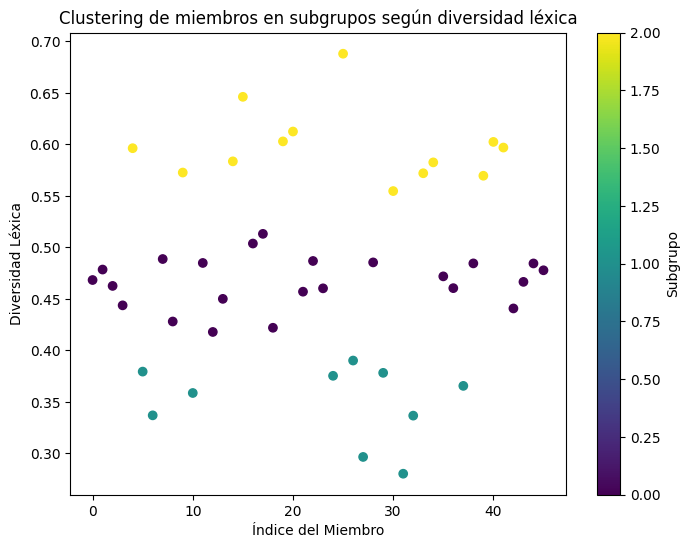

   Genero  diversidad_lextica  subgrupo
0       M            0.468363         0
1       F            0.478535         0
2       M            0.462639         0
3       M            0.443759         0
4       M            0.596378         2
5       M            0.379421         1
6       M            0.336940         1
7       M            0.488754         0
8       F            0.428075         0
9       M            0.572735         2
10      M            0.358656         1
11      F            0.484932         0
12      M            0.417916         0
13      M            0.450066         0
14      M            0.583601         2
15      M            0.646261         2
16      M            0.503799         0
17      M            0.513201         0
18      M            0.421989         0
19      M            0.602985         2
20      F            0.612563         2
21      M            0.457032         0
22      M            0.486855         0
23      M            0.460286         0


In [125]:
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data['diversidad_lextica'], c=data['subgrupo'], cmap='viridis', marker='o')
plt.title('Clustering de miembros en subgrupos según diversidad léxica')
plt.xlabel('Índice del Miembro')
plt.ylabel('Diversidad Léxica')
plt.colorbar(label='Subgrupo')
plt.show()

print(data[['Genero', 'diversidad_lextica', 'subgrupo']])

**Se han identificado tres clústeres entre los estudiantes, clasificados según su diversidad léxica (que se entiende como la variedad del vocabulario utilizado en sus respuestas). El primer grupo presenta una diversidad léxica que varía entre 0.30 y 0.40, el segundo grupo oscila entre 0.40 y 0.50, y el tercer grupo muestra una diversidad léxica que va de 0.55 a 0.70.**